In [37]:
import os
import pandas as pd
import func_stat

In [54]:
dirCatalogs=r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\SOM\forArticle\ex019\datasets'

dirExps=r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\experimentsArticle\DirtySample'
catNameClean=r'05_COSMOS_SpectrZ_Zlim_1p2_specZOutlCoeff_filter.csv'
catNameRandom=r'05_COSMOS_SpectrZ_Zlim_1p2_randSample.csv'
dataClean=pd.read_csv(os.path.join(dirCat,catNameClean))
dataRandom=pd.read_csv(os.path.join(dirCat,catNameRandom))

In [55]:
idcolumn='Seq'
zspeccolumn='z_spec'
photoZ_SED='zphot'
photoZ_ML='zphoto'

In [56]:
### Create resid column ###
def residCol(df,colSpectrZ, colPhotoZ,colResid):
    df[colResid]=(df[colSpectrZ]-df[colPhotoZ])/(df[colSpectrZ]+1)
    return df

In [57]:
dataExpClean=pd.read_csv(os.path.join(dirExps,'exp027',
                                      'METAPHOR_testout_05_COSMOS_SpectrZ_Zlim_1p2_specZOutlCoeff_filter.csv'))
dataExpRandom=pd.read_csv(os.path.join(dirExps,'exp028',
                                      'METAPHOR_testout_05_COSMOS_SpectrZ_Zlim_1p2_randSample.csv'))

In [58]:
dataClean=dataClean.merge(dataExpClean,on='Seq')
dataRandom=dataRandom.merge(dataExpRandom,on='Seq')

In [59]:
dataClean.columns

Index(['RAJ2000', 'DEJ2000', 'Seq', 'Ksmagap3', 'Ymagap3', 'Hmagap3',
       'Jmagap3', 'Bmagap3', 'Vmagap3', 'ipmagap3', 'rmagap3', 'umagap3',
       'zppmagap3', 'zphot', 'Instr', 'z_spec_x', 'Q_f', 'sc_Ksmagap3',
       'sc_Ymagap3', 'sc_Hmagap3', 'sc_Jmagap3', 'sc_Bmagap3', 'sc_Vmagap3',
       'sc_ipmagap3', 'sc_rmagap3', 'sc_umagap3', 'sc_zppmagap3',
       'w_sc_Ksmagap3', 'w_sc_Ymagap3', 'w_sc_Hmagap3', 'w_sc_Jmagap3',
       'w_sc_Bmagap3', 'w_sc_Vmagap3', 'w_sc_ipmagap3', 'w_sc_rmagap3',
       'w_sc_umagap3', 'w_sc_zppmagap3', 'quantErr', 'cellID_TrainSOM',
       'z_spec_outlCoeff', 'quantErr_outlCoeff', 'trainMapOccupation',
       'z_spec_y', 'zphoto'],
      dtype='object')

In [60]:
dataClean=residCol(dataClean,colSpectrZ=zspeccolumn+'_x', colPhotoZ=photoZ_SED,colResid='resid_SED')
dataClean=residCol(dataClean,colSpectrZ=zspeccolumn+'_x', colPhotoZ=photoZ_ML,colResid='resid_ML')
dataRandom=residCol(dataRandom,colSpectrZ=zspeccolumn+'_x', colPhotoZ=photoZ_SED,colResid='resid_SED')
dataRandom=residCol(dataRandom,colSpectrZ=zspeccolumn+'_x', colPhotoZ=photoZ_ML,colResid='resid_ML')

In [68]:
print('Clean sample, SED photo-z',func_stat.statResid(dataClean,colResid='resid_SED'))
print('Clean sample, ML photo-z',func_stat.statResid(dataClean,colResid='resid_ML'))
print('Random sample, SED photo-z',func_stat.statResid(dataRandom,colResid='resid_SED'))
print('Random sample, ML photo-z',func_stat.statResid(dataRandom,colResid='resid_ML'))
stats=pd.DataFrame(columns=['sample','Num objects',
                            'Std_ML','NMAD_ML','Mean_ML','% outl_15_ML',
                           'Std_SED','NMAD_SED','Mean_SED','% outl_15_SED'])
clSample={}
for key,val in func_stat.statResid(dataClean,colResid='resid_SED').items():
    if key!='Num objects':
        clSample[key+'_SED']=val
    else:
        clSample[key]=val
for key,val in func_stat.statResid(dataClean,colResid='resid_ML').items():
    if key!='Num objects':
        clSample[key+'_ML']=val
clSample['sample']='Clean'
stats=stats.append(clSample,ignore_index=True)
        
randSample={}
for key,val in func_stat.statResid(dataRandom,colResid='resid_SED').items():
    if key!='Num objects':
        randSample[key+'_SED']=val
    else:
        randSample[key]=val
for key,val in func_stat.statResid(dataRandom,colResid='resid_ML').items():
    if key!='Num objects':
        randSample[key+'_ML']=val
randSample['sample']='Random'
stats=stats.append(randSample,ignore_index=True)

Clean sample, SED photo-z {'Num objects': 7218, 'Std': 0.135, 'NMAD': 0.012, 'Mean': -0.0134, '% outl_15': 1.93}
Clean sample, ML photo-z {'Num objects': 7218, 'Std': 0.033, 'NMAD': 0.018, 'Mean': -0.0009, '% outl_15': 0.57}
Random sample, SED photo-z {'Num objects': 7218, 'Std': 0.178, 'NMAD': 0.015, 'Mean': -0.0238, '% outl_15': 5.78}
Random sample, ML photo-z {'Num objects': 7218, 'Std': 0.072, 'NMAD': 0.025, 'Mean': -0.0055, '% outl_15': 4.32}


In [70]:
stats.to_latex()

'\\begin{tabular}{lllrrrrrrrr}\n\\toprule\n{} &  sample & Num objects &  Std\\_ML &  NMAD\\_ML &  Mean\\_ML &  \\% outl\\_15\\_ML &  Std\\_SED &  NMAD\\_SED &  Mean\\_SED &  \\% outl\\_15\\_SED \\\\\n\\midrule\n0 &   Clean &        7218 &   0.033 &    0.018 &  -0.0009 &          0.57 &    0.135 &     0.012 &   -0.0134 &           1.93 \\\\\n1 &  Random &        7218 &   0.072 &    0.025 &  -0.0055 &          4.32 &    0.178 &     0.015 &   -0.0238 &           5.78 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [14]:
import matplotlib.pyplot as plt

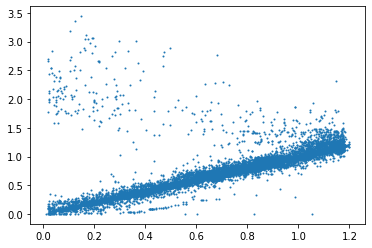

In [15]:
plt.scatter(data['z_spec'],data['zphot'],s=1)

(-0.5, 0.5)

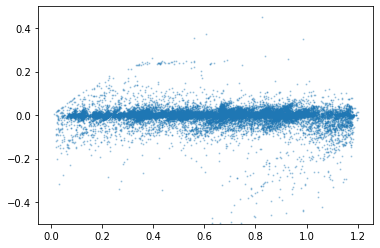

In [19]:
plt.scatter(data['z_spec'],data['resid_SED'],s=1,alpha=0.3)
plt.ylim(-0.5,0.5)

In [20]:
data['Q_f'].unique()

array([ 3,  4,  2, 21,  1, 23,  9, 22, 24, 29,  5, 12,  6], dtype=int64)

3 6825
4 9475
2 6151
1 709
23 64
9 710
22 45
24 31


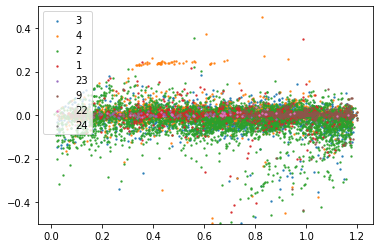

In [26]:
for q in data['Q_f'].unique():
    d=data[data['Q_f']==q]
    if len(d)>30:
        print(q,len(d))
        plt.scatter(d['z_spec'],d['resid_SED'],s=2,alpha=0.8,label=q)
    plt.ylim(-0.5,0.5)
plt.legend()

In [35]:
d=data[data['Q_f']==2]
func_stat.statResid(d,colResid='resid_SED')

{'Num objects': 6151,
 'Std': 0.248,
 'NMAD': 0.026,
 'Mean': -0.0471,
 '% outl_15': 4.5}